#IMPORTING FILES

In [1]:
import pandas as pd

In [2]:
pd.read_csv("cancer_data.csv")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
medical=pd.read_csv("Cancer_data.csv")

In [5]:
medical.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
import matplotlib.pyplot as plt

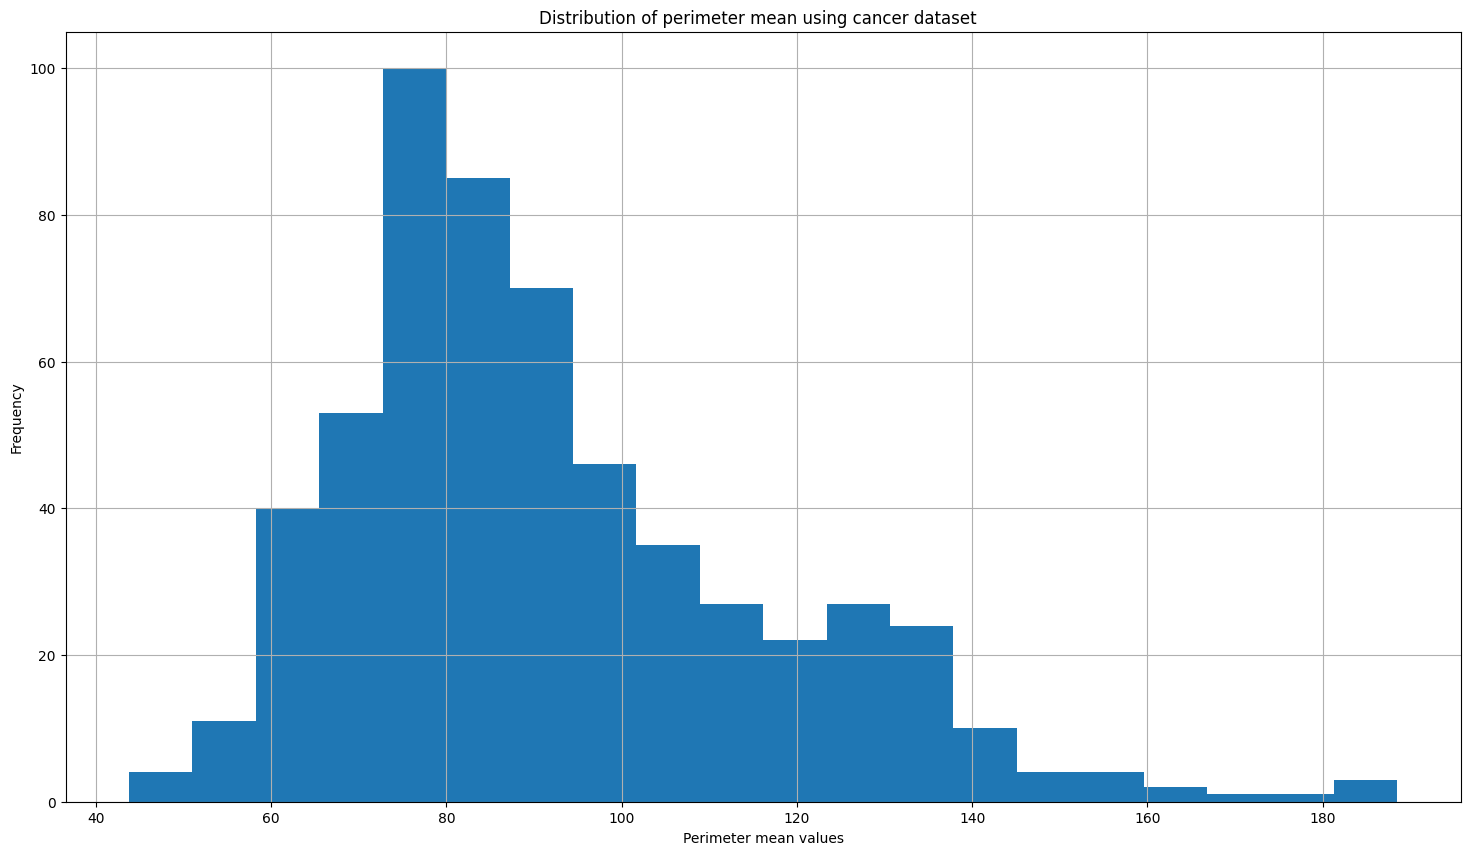

In [7]:
#Histogram of one variable (perimeter_mean)
medical.hist(['perimeter_mean'],bins=20 ,figsize=(18,10))
#To add titles and axes names
plt.title('Distribution of perimeter mean using cancer dataset  ')
plt.xlabel('Perimeter mean values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The above Histogram shows the perimeter mean is not normally distributed but skewed to the right which shows there are some large values(perimeter_mean) that are pulling the average to the right. thus indicating that the mean is greater than the median

In [8]:
medical["perimeter_mean"].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

In [9]:
stats=medical['perimeter_mean'].describe()
print(stats)

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64


3:outliers

In [10]:
Q1 = medical['perimeter_mean'].quantile(0.25)
Q3 = medical['perimeter_mean'].quantile(0.75)
IQR = Q3 - Q1

In [11]:
Lower_bounds = Q1 - 1.5 * IQR
Upper_bounds = Q3 - 1.5 * IQR

#IDENTIFY OUTLIERS
Outliers = medical[(medical['perimeter_mean']<Lower_bounds) | (medical['perimeter_mean']> Upper_bounds)]
Outliers = Outliers.shape[0]

In [12]:
unique_values_count = medical['perimeter_mean'].nunique()
unique_values_count

522

MARGINAL PROBABILITY OF "PERIMETER_MEAN"


In [14]:
import seaborn as sns

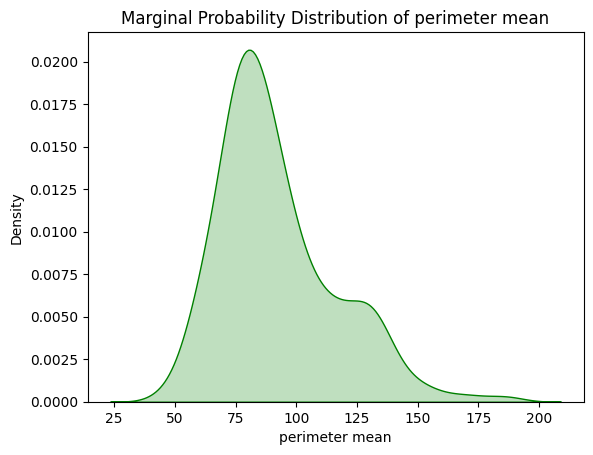

In [15]:
#HERE we are finding probability of perimeter_mean
sns.kdeplot(medical['perimeter_mean'], fill=True,color='green')
plt.title('Marginal Probability Distribution of perimeter mean')
plt.xlabel('perimeter mean')
plt.ylabel('Density')
plt.show()

In [16]:
#probalility of perimete_mean <=20
probalility_less_than_20 = (medical['perimeter_mean'] <=20).mean()

In [17]:
# Reload the dataset

# Calculate the IQR for 'perimeter_mean'
Q1 = medical['perimeter_mean'].quantile(0.25)
Q3 = medical['perimeter_mean'].quantile(0.75)
IQR = Q3 - Q1

# Determine lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = medical[(medical['perimeter_mean'] < lower_bound) | (medical['perimeter_mean'] > upper_bound)]

# Show the number of outliers and the outlier data
outliers_count = outliers.shape[0]
outliers_count, outliers[['perimeter_mean']]


(13,
      perimeter_mean
 82            171.5
 108           152.8
 122           166.2
 164           152.1
 180           182.1
 202           158.9
 212           188.5
 236           153.5
 339           155.1
 352           174.2
 461           186.9
 503           152.1
 521           165.5)

There are 13 outliers in the perimeter_mean variable. These outliers have perimeter values ranging from 152.1 to 188.5, which are above the upper bound of the normal range.

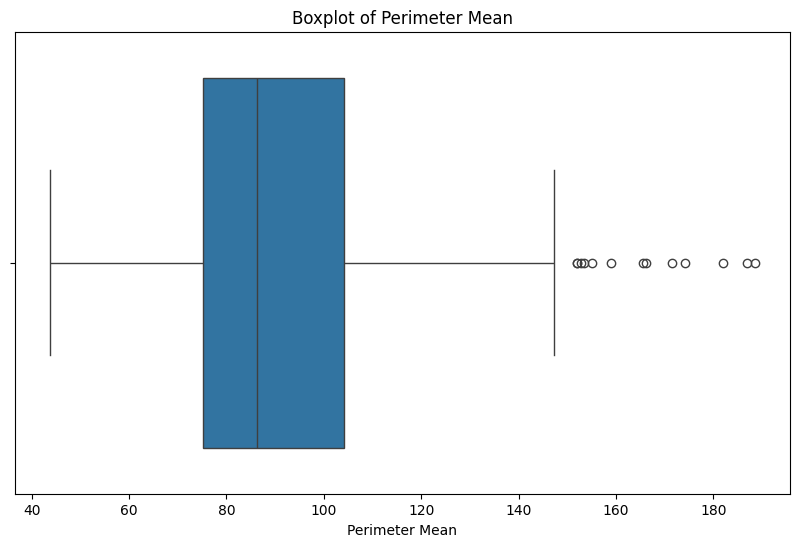

In [18]:
# Plot the boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=medical['perimeter_mean'])
plt.title('Boxplot of Perimeter Mean')
plt.xlabel('Perimeter Mean')
plt.show()

In [19]:
#5
# Import necessary library for effect size calculation
import numpy as np

# Separate the data into malignant (M) and benign (B) groups based on diagnosis
malignant =medical[medical['diagnosis'] == 'M']['perimeter_mean']
benign = medical[medical['diagnosis'] == 'B']['perimeter_mean']

# Calculate the means and standard deviations
mean_malignant = malignant.mean()
mean_benign = benign.mean()
std_pooled = np.sqrt(((malignant.std() ** 2) + (benign.std() ** 2)) / 2)

# Calculate Cohen's d
cohens_d = (mean_malignant - mean_benign) / std_pooled
mean_malignant, mean_benign, cohens_d


(np.float64(115.36537735849056),
 np.float64(78.075406162465),
 np.float64(2.1229994190819275))

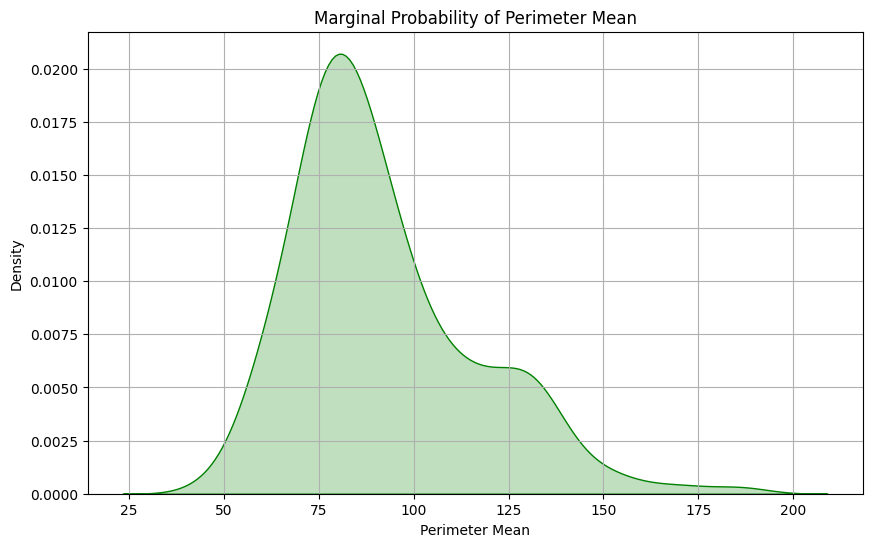

In [20]:
# Plot the probability density function (PDF) for 'perimeter_mean'
plt.figure(figsize=(10, 6))
sns.kdeplot(medical['perimeter_mean'], color='green', fill=True)

plt.title('Marginal Probability of Perimeter Mean')
plt.xlabel('Perimeter Mean')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [21]:
!pip install scipy

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [23]:
# Extract the perimeter_mean column
perimeter_mean = medical['perimeter_mean']

# Calculate the KDE
kde = gaussian_kde(perimeter_mean)

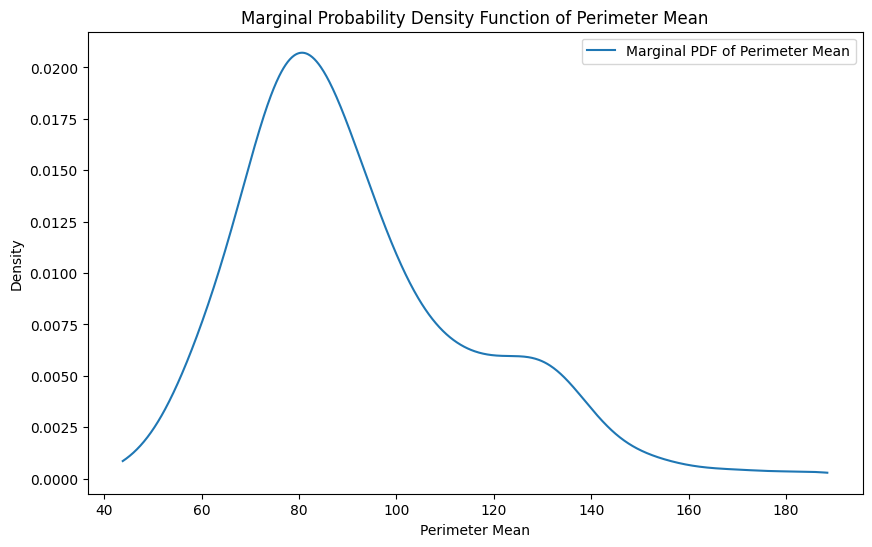

In [24]:
# Define a range of values for perimeter_mean
x_values = np.linspace(min(perimeter_mean), max(perimeter_mean), 1000)

# Calculate the PDF values
pdf_values = kde(x_values)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, label='Marginal PDF of Perimeter Mean')
plt.xlabel('Perimeter Mean')
plt.ylabel('Density')
plt.title('Marginal Probability Density Function of Perimeter Mean')
plt.legend()
plt.show()

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [26]:
perimeter_mean = medical['perimeter_mean']
area_mean = medical['area_mean']



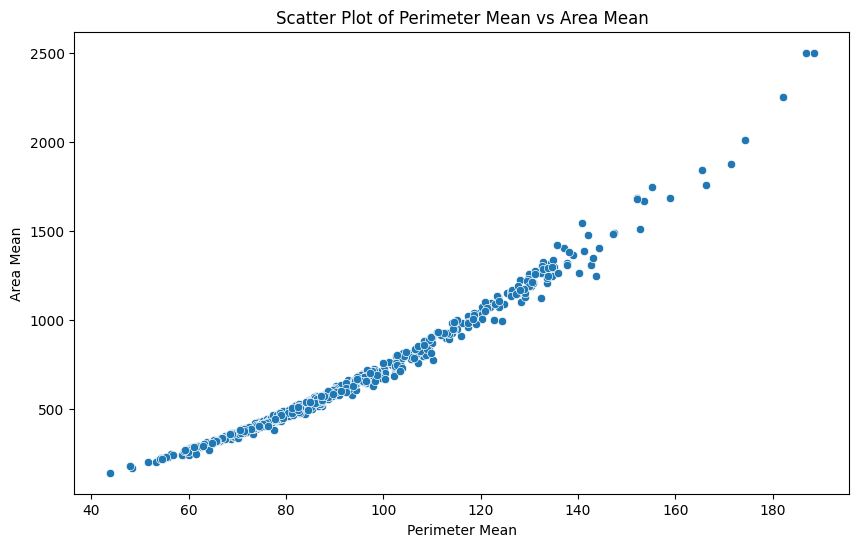

Pearson correlation coefficient: 0.98650680399139
P-value: 0.0


In [27]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=perimeter_mean, y=area_mean)
plt.title('Scatter Plot of Perimeter Mean vs Area Mean')
plt.xlabel('Perimeter Mean')
plt.ylabel('Area Mean')
plt.show()
# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(perimeter_mean, area_mean)
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')


In [29]:
# Save the dataset as an Excel file with the user's last name (ARNOLD.xlsx)
output_file_path = 'SAMANTHA.xlsx'
medical.to_excel(output_file_path, index=False)

output_file_path  # Return the file path for confirmation


'SAMANTHA.xlsx'

https://www.kaggle.com/kabehosamantha